In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("iris.csv")

In [8]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
#display statistics about data
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
#display number of samples on each class
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [14]:
#preprocessing the dataset
#check for null values and remove them
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [15]:
#there are no null values

<AxesSubplot:>

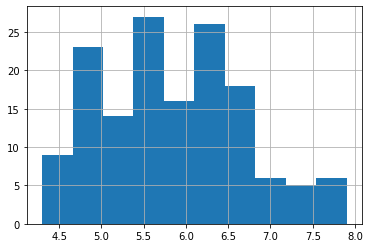

In [16]:
#exploratory data analysis
df['sepal length'].hist()

<AxesSubplot:>

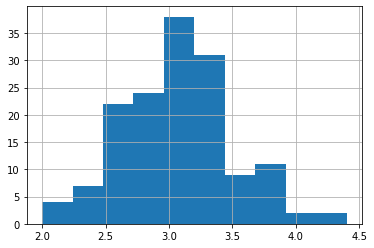

In [17]:
df['sepal width'].hist()

<AxesSubplot:>

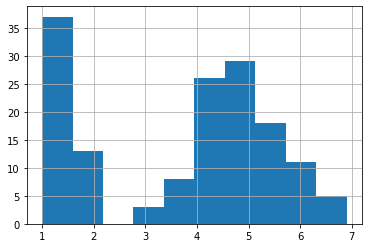

In [18]:
df['petal length'].hist()

<AxesSubplot:>

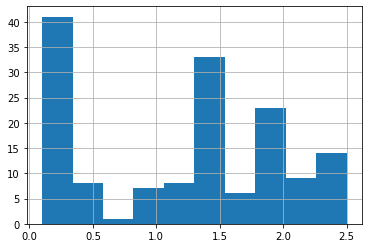

In [19]:
df['petal width'].hist()

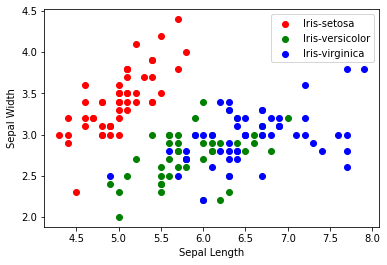

In [22]:
#scatterplot
colors=['red','green','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

#iterate 3 classes
for i in range(3):
    x=df[df['class']==species[i]]
    plt.scatter(x['sepal length'],x['sepal width'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

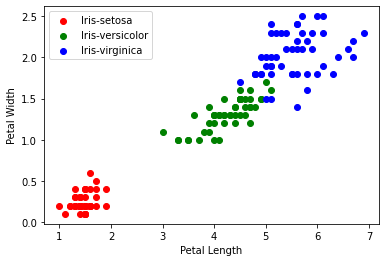

In [23]:
for i in range(3):
    x=df[df['class']==species[i]]
    plt.scatter(x['petal length'],x['petal width'], c=colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

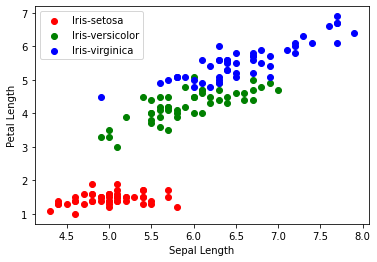

In [24]:
for i in range(3):
    x=df[df['class']==species[i]]
    plt.scatter(x['sepal length'],x['petal length'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

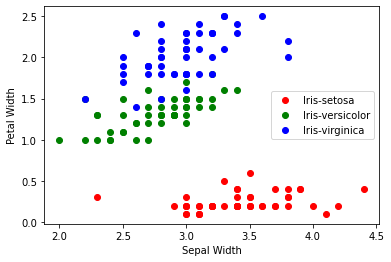

In [25]:
for i in range(3):
    x=df[df['class']==species[i]]
    plt.scatter(x['sepal width'],x['petal width'], c=colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [26]:
#co-relation matrix
df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

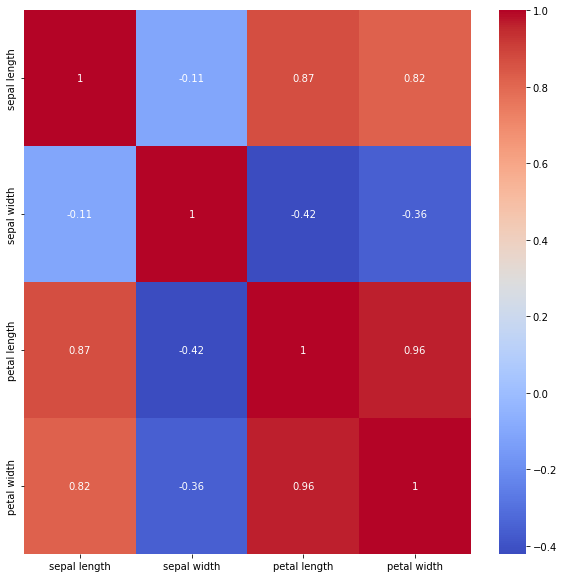

In [28]:
corr=df.corr()
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [29]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [31]:
df['class']=le.fit_transform(df['class'])
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
#model training
from sklearn.model_selection import train_test_split
x=df.drop(columns=['class'])
y=df['class']
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.30)

In [33]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [34]:
model.fit(x_train, y_train)

LogisticRegression()

In [36]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  97.77777777777777


In [37]:
#K nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [38]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [39]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  97.77777777777777


In [40]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [41]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  95.55555555555556
